In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Acer\AppData\Local\Temp\ipykernel_15540\3632437423.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Dataset Alternative Fuel Vehicles

In [2]:
df1= pd.read_csv("E:/proyecto_final/datasets/Alternative Fuel Vehicles US.csv")
pd.set_option('display.max_columns', None)
df1.sample(5)

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
164,SUV,Wrangler 4dr 4xe,2022.0,Jeep,Plug-in Hybrid Electric,22.0,370.0,NaN,NaN,49.0,20.0,20.0,20.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,4WD
475,SUV,Range Rover PHEV,2021.0,Land Rover,Plug-in Hybrid Electric,19.0,NaN,NaN,NaN,42.0,18.0,21.0,19.0,Auto,NaN,CI,2.0L,4.0,NaN,NaN,NaN,NaN
637,Transit Bus,K9MD (40'),NaN,BYD,Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BYD,NaN,NaN,NaN,42,BYD 180 kWx2 in-wheel motor,According to manufacturer: 446kWh battery; up ...,NaN
15,Sedan/Wagon,A8L quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,19.0,28.0,22.0,Auto,NaN,SI,3.0L,6.0,NaN,NaN,NaN,AWD
238,Sedan/Wagon,S 580 4MATIC Maybach,2022.0,Mercedes-Benz,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,15.0,24.0,18.0,Auto,NaN,SI,4.0L,8.0,NaN,NaN,NaN,AWD


### Se eliminan columnas inncesarias

In [3]:
df1 = df1.drop(columns={'Transmission Type', 'Transmission Make', 'Number of Passengers','Engine Type', 'Engine Size', 'Engine Cylinder Count',
                        'Heavy-Duty Power System', 'Notes', 'Drivetrain'})

Se normalizan los nombres de cada columna

In [4]:
df1.columns

Index(['Category', 'Model', 'Model Year', 'Manufacturer', 'Fuel',
       'All-Electric Range', 'PHEV Total Range',
       'Alternative Fuel Economy City', 'Alternative Fuel Economy Highway',
       'Alternative Fuel Economy Combined', 'Conventional Fuel Economy City',
       'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined'],
      dtype='object')

Renombramos columnas

In [5]:
df1.rename(columns={'Category':'category', 'Model': 'model', 'Model Year':'model_year', 'Manufacturer':'manufacturer'
    , 'Fuel': 'fuel','All-Electric Range': 'all_electric_range', 'PHEV Total Range':'PHEV_total_range',
       'Alternative Fuel Economy City': 'alternative_fuel_economy_city', 'Alternative Fuel Economy Highway':'alternative_fuel_economy_highway',
       'Alternative Fuel Economy Combined': 'alternative_fuel_economy_combined', 'Conventional Fuel Economy City': 'conventional_fuel_economy_city',
       'Conventional Fuel Economy Highway': 'conventional_fuel_economy_highway',
       'Conventional Fuel Economy Combined': 'conventional_fuel_economy_combined'
    }, inplace = True)

### Se verifica el tipo de dato de cada columna

In [6]:
df1.shape, df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   category                            882 non-null    object 
 1   model                               882 non-null    object 
 2   model_year                          594 non-null    float64
 3   manufacturer                        882 non-null    object 
 4   fuel                                882 non-null    object 
 5   all_electric_range                  222 non-null    float64
 6   PHEV_total_range                    43 non-null     float64
 7   alternative_fuel_economy_city       169 non-null    float64
 8   alternative_fuel_economy_highway    169 non-null    float64
 9   alternative_fuel_economy_combined   262 non-null    float64
 10  conventional_fuel_economy_city      444 non-null    float64
 11  conventional_fuel_economy_highway   444 non-n

((882, 13), None)

Tenemos 882 filas y 13 columnas

Se modifica el tipo de dato de 'Model Year' a entero

In [7]:
df1['model_year'] = df1['model_year'].astype('Int64')

In [8]:
df1.columns

Index(['category', 'model', 'model_year', 'manufacturer', 'fuel',
       'all_electric_range', 'PHEV_total_range',
       'alternative_fuel_economy_city', 'alternative_fuel_economy_highway',
       'alternative_fuel_economy_combined', 'conventional_fuel_economy_city',
       'conventional_fuel_economy_highway',
       'conventional_fuel_economy_combined'],
      dtype='object')

Validamos si hay valores nulos

In [9]:
df1.isna().sum()

category                                0
model                                   0
model_year                            288
manufacturer                            0
fuel                                    0
all_electric_range                    660
PHEV_total_range                      839
alternative_fuel_economy_city         713
alternative_fuel_economy_highway      713
alternative_fuel_economy_combined     620
conventional_fuel_economy_city        438
conventional_fuel_economy_highway     438
conventional_fuel_economy_combined    438
dtype: int64

Hay valores nulos pero se opta por noi borrarlos ya que me afectaria otras columnas que si tienen valor para el analisis

validamos valores duplicados

In [10]:
df1.duplicated().value_counts()

False    880
True       2
Name: count, dtype: int64

hay 2  valores duplicados, se eliminan

In [11]:
df1.drop_duplicates(inplace= True)

### Analisis Descriptivo

In [12]:
df1.describe()

,model_year,all_electric_range,PHEV_total_range,alternative_fuel_economy_city,alternative_fuel_economy_highway,alternative_fuel_economy_combined,conventional_fuel_economy_city,conventional_fuel_economy_highway,conventional_fuel_economy_combined
count,593.0,222.000000,43.000000,169.000000,169.000000,262.000000,443.000000,443.000000,443.000000
mean,2021.539629,165.927928,450.465116,84.585799,77.591716,75.992366,25.907449,30.085779,27.264108
std,0.498848,132.992955,93.042578,39.430696,32.735123,32.303279,10.872066,12.830142,9.814812
min,2021.0,8.000000,290.000000,10.000000,12.000000,11.000000,13.000000,16.000000,15.000000
25%,2021.0,23.000000,380.000000,71.000000,66.000000,56.000000,19.000000,24.000000,21.000000
50%,2022.0,203.000000,460.000000,94.000000,85.000000,76.000000,22.000000,28.000000,24.000000
75%,2022.0,260.000000,520.000000,115.000000,99.000000,101.000000,28.000000,33.000000,30.000000
max,2022.0,520.000000,640.000000,150.000000,133.000000,142.000000,59.000000,231.000000,59.000000


Se quiere conformar un dataset con las categorias de vehiculos que pueden ser utilizados en la flota y su rendimiento.

* La media de autonomia de un vehiculo 100% electrico es de 166 millas.
* La media de autonomia de un vehiculo hibrido enchufable es de 450 millas. 
* La media de autonomia de un vehiculo convencional de combustible es de 443 millas. 

Verificamos que categorias pueden ser usadas en el modelo de negocio

In [13]:
df1['category'].value_counts()

category
Sedan/Wagon                      282
SUV                              222
Pickup                            79
Transit Bus                       76
Vocational/Cab Chassis            68
Passenger Van/Shuttle Bus         46
Van                               23
Street Sweeper                    21
School Bus                        21
Refuse                            16
Tractor                           15
Step Van                           5
TractorVocational/Cab Chassis      4
Vocational/Cab ChassisVan          1
Vocational/Cab ChassisTractor      1
Name: count, dtype: int64

Por tamaño de cantidad de pasajeros solo las categorias : 'Sedan' y 'Suv' son operativas para el negocio
creamos el nuevo dataset

In [14]:
df_categorias = df1.loc[df1['category'].isin(['Sedan/Wagon', 'SUV'])]
df_categorias.head()

,category,model,model_year,manufacturer,fuel,all_electric_range,PHEV_total_range,alternative_fuel_economy_city,alternative_fuel_economy_highway,alternative_fuel_economy_combined,conventional_fuel_economy_city,conventional_fuel_economy_highway,conventional_fuel_economy_combined
0,Sedan/Wagon,NSX,2022,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,21.0,22.0,21.0
1,Sedan/Wagon,A3,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,29.0,38.0,32.0
2,Sedan/Wagon,A3 quattro,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,28.0,36.0,31.0
3,Sedan/Wagon,A4 allroad quattro,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,24.0,30.0,26.0
4,Sedan/Wagon,A4 quattro,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,26.0,34.0,29.0


In [15]:
df_categorias['fuel'].value_counts()

fuel
Hybrid Electric            254
Electric                   125
Plug-in Hybrid Electric     91
Biodiesel (B20)             22
Hydrogen Fuel Cell          10
Ethanol (E85)                2
Name: count, dtype: int64

Grafico de barras 'Rendimiento en millas por categoria de vehículo'

Text(0.5, 0, 'Categoria')

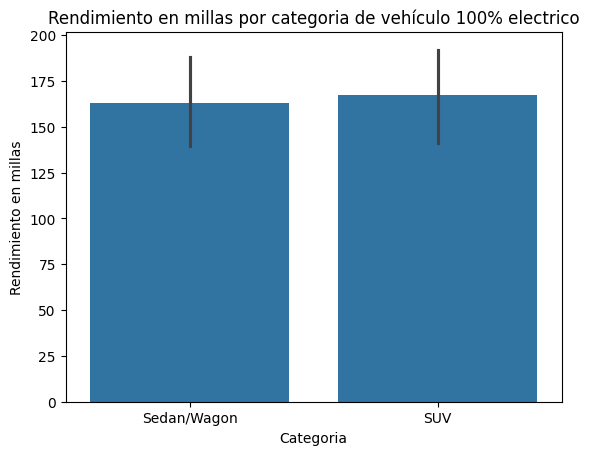

In [16]:
sns.barplot(x = df_categorias['category'] , y = df_categorias['all_electric_range'])
plt.title('Rendimiento en millas por categoria de vehículo 100% electrico')
plt.ylabel(ylabel='Rendimiento en millas')
plt.xlabel(xlabel='Categoria')



Text(0.5, 0, 'Categoria')

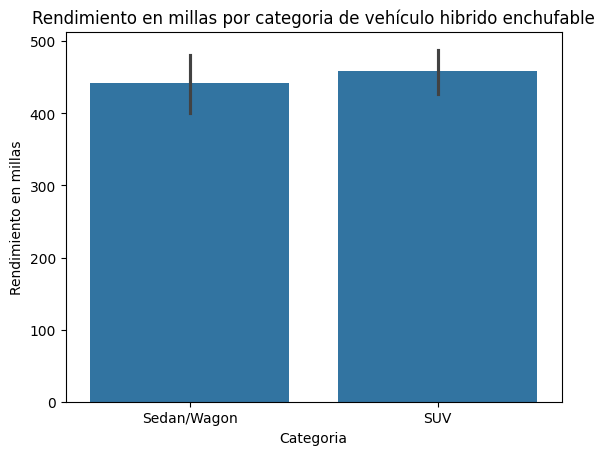

In [17]:
sns.barplot(x = df_categorias['category'] , y = df_categorias['PHEV_total_range'])
plt.title('Rendimiento en millas por categoria de vehículo hibrido enchufable')
plt.ylabel(ylabel='Rendimiento en millas')
plt.xlabel(xlabel='Categoria')

Text(0.5, 0, 'Categoria')

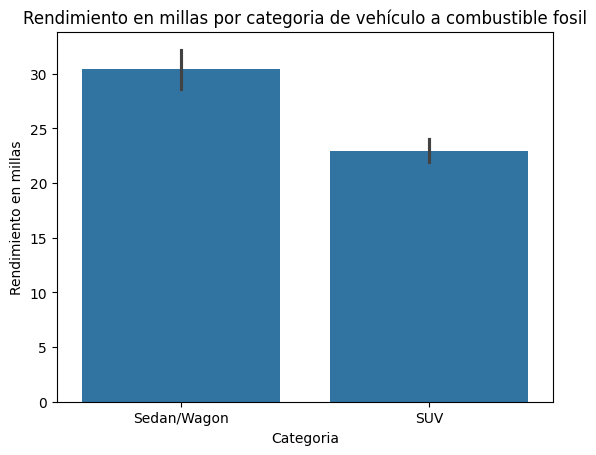

In [18]:
	
sns.barplot(x = df_categorias['category'] , y = df_categorias['conventional_fuel_economy_city'])
plt.title('Rendimiento en millas por categoria de vehículo a combustible fosil')
plt.ylabel(ylabel='Rendimiento en millas')
plt.xlabel(xlabel='Categoria')

Se observa que un Sedan o suv 100% electrico da una autonomia aproximada de 162 millas por carga completa
mientras que un carro hibrido enchufable da una autonomia de 430 millas por tanque y carga full

Carro hibrido

In [19]:
# Automia de 450 km
galones = 13.2
valor_galon = 4.05
cant_kwatts = 20
valor_kwatts = 0.15
gasto_hev = galones* valor_galon + cant_kwatts * valor_kwatts
gasto_hev

56.459999999999994

Carro 100 % electrico

In [20]:
# Automia de 450 km

gasto_ev = valor_kwatts * 450
gasto_ev

67.5

Carro convencional

In [21]:
# para recorrer 450 millas es necesario 15 galones
gasto_conv = valor_galon * 15
gasto_conv

60.75